In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Parameter Model (rho, R)
rho1 = 1
rho2 = 1 #perbedaan densitas (kg/m^3)

#Konstanta
x0 = 50
m = 30
z = 100
cGrav = 6.674e-11 #Konstanta Gravitasi (m^3 kg^-1 s^-2)
si2mg = 1e5         #1 SI (ms^-2) = 1e5 mGal


In [7]:
#Lokasi Pengukuran
x = np.arange(0,102,2)

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [46]:
#FORMULA FORWARD SQUARE
k1 = cGrav*rho1
dg1 = []
for i in range(len(x)):
    a1 = int((m/2)+(x[i]-x0))    
    b1 = int((x[i]-x0)-(m/2))
    dgA = k1*(a1*np.log((a1**2+z**2)/a1**2)-(b1*np.log((b1**2+z**2)/b1**2))+((2*z)*(np.arctan(a1/z)- np.arctan(b1/z))))
k2 = cGrav*rho2
dg2 = []
for i in range(len(x)):
    a2 = (m/2)+(x[i]-x0)      #Jarak Ke P(x,0)
    b2 = (x[i]-x0)-(m/2)
    dgB = k2*(a2*np.log((a2**2+z**2)/a2**2)-(b2*np.log((b2**2+z**2)/b2**2))+((2*z)*(np.arctan(a2/z)-np.arctan(b2/z))))
    dg2.append(dgB)

-165


In [42]:
#Forward modeling 1
# dg1  = dg1*si2mg  #1 SI = 1e5 mGal
print(dg1)
# dg2  = dg2*si2mg  #1 SI = 1e5 mGal
x = [-z,(-z-20),(-z-20),-z]
y = [((x0/2)-(m/6)),((x0/2)-(m/6)),((x0/2)+(m/3)),((x0/2)+(m/3))]
x1 = [-z,(-z-20),(-z-20),-z]
y1 = [((x0/2)-(m/6)),((x0/2)-(m/6)),((x0/2)+(m/3)),((x0/2)+(m/3))]


[7.4118235857035757e-10, 5.982952417034764e-10, 5.982952417034764e-10, 7.4118235857035757e-10]


C:\Users\Hadyan Pratama\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  after removing the cwd from sys.path.
C:\Users\Hadyan Pratama\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\Hadyan Pratama\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Users\Hadyan Pratama\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned

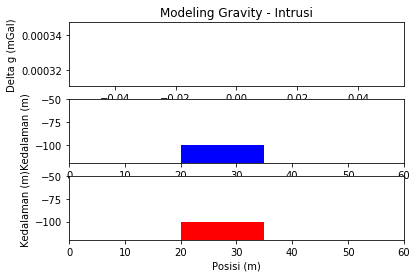

In [6]:
plt.figure(1)  # make separate figure
plt.subplot(3, 1, 1)
plt.plot(dg1,'b')
plt.hold('on')

plt.subplot(3,1,1)
plt.plot(dg2,'r')
plt.xlabel('Posisi (m)')
plt.ylabel('Delta g (mGal)')
plt.title('Modeling Gravity - Intrusi')
plt.hold('off')

plt.subplot(3,1,2)
plt.fill(y,x,'b')
plt.xlim([0,60])
plt.ylim([-120,-50])
plt.xlabel('Posisi (m)')
plt.ylabel('Kedalaman (m)')

plt.subplot(3,1,3)
plt.fill(y1,x1,'r')
plt.xlim([0,60])
plt.ylim([-120,-50])
plt.xlabel('Posisi (m)')
plt.ylabel('Kedalaman (m)')

plt.show()